In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from googletrans import Translator 
pd.set_option('display.html.table_schema', True)

# 전처리 가설
## shop.csv 파일을 살펴본 결과 단순한 스토어 개념이 아닌, 각 레벨 별 계층적 구조로 있는것으로 확인, 중간에는 온라인스토어또한 있어서 그에 대한 고려가 필요할듯. 

### 특히 한 컬럼으로만 되어있는 store name이 실제로는 Region을 반영한 이름이었음. 구글 번역기를 통해 영어로 번역한 후  각 store를 카테고리화홤.

In [2]:
shop_df = pd.read_csv('../data/shops_trans.csv', encoding='utf-8')
shop_df = shop_df.drop(["shop_name"], axis=1)

In [3]:
shop_df.head()

,shop_id,en_shop
0,0,"Yakutsk Ordzhonikidze, 56 francs"
1,1,"Yakutsk TC ""Central"" franc"
2,2,"Adygea Shopping Center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""


In [4]:
def split(name):
    sptname = name.split(' "')
    lastspt = sptname[0].split(" ")
    return lastspt[0]
#     if '"' in name:
#         return ame.('"')
#     else:
#         return name
shop_df["Region"] = list(map(split, shop_df.en_shop))

## 몇가지 궁금한 사항 : 아래를 보면 10번과 11번은 거의 동일해보인다. 과연 이 두 데이터는 중복되었는가? 아니면 각자의 의미가 있는것인가?

In [5]:
shop_df.iloc[8:13]

,shop_id,en_shop,Region
8,8,"Voronezh TRC City-Park ""Grad""",Voronezh
9,9,Outbound Trade,Outbound
10,10,Zhukovsky Str. Chkalov 39m?,Zhukovsky
11,11,Zhukovsky Str. Chkalov 39 m²,Zhukovsky
12,12,Online shop Emergency,Online


In [6]:
sales_df = pd.read_csv("../data/sales_train_v2.csv")

In [7]:
merged_sample = pd.merge(sales_df, shop_df, on = "shop_id")
merged_sample.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,en_shop,Region
0,02.01.2013,0,59,22154,999.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl
1,10.01.2013,0,59,22151,399.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl
2,04.01.2013,0,59,5603,699.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl
3,19.01.2013,0,59,5587,199.0,2.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl
4,31.01.2013,0,59,5613,5571.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl


In [8]:
date_df = pd.DataFrame(merged_sample["date"].str.split(".").tolist(),  columns = ['day','month','year'])
date_df.head()

,day,month,year
0,02,01,2013
1,10,01,2013
2,04,01,2013
3,19,01,2013
4,31,01,2013


In [9]:
pre_data = pd.merge(merged_sample, date_df, left_index=True, right_index=True)
pre_data.head()
del pre_data["date_block_num"]
del pre_data["date"]
pre_data.head()

,shop_id,item_id,item_price,item_cnt_day,en_shop,Region,day,month,year
0,59,22154,999.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,02,01,2013
1,59,22151,399.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,10,01,2013
2,59,5603,699.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,04,01,2013
3,59,5587,199.0,2.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,19,01,2013
4,59,5613,5571.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,31,01,2013


In [10]:
AD = pd.DataFrame(pre_data.groupby(["Region", "en_shop", "year", "month"])["item_cnt_day"].sum())
AD.head()

item_cnt_day
Region en_shop                       year month              
Adygea Adygea Shopping Center "Mega" 2013 01           1146.0
                                          02            488.0
                                          03            753.0
                                          04            583.0
                                          05            553.0

## moscow만 봐도 ("Moscow Shopping Center "Silver House"   / Moscow TC "Budenovskiy" (pav.A2) 연속되지 않은 데이터가 있다. 이말 인 즉슨 카테고리 코드로서는 남아있지만 폐점되었을 가능성이 있는 가게들이 있다는 것이다.

In [11]:
temp_moscow = AD[AD.index.get_level_values(0).values == "Moscow"]
pd.set_option('display.max_rows', 500)
temp_moscow

item_cnt_day
Region en_shop                                year month              
Moscow Moscow "Sale"                          2014 10           3261.0
                                              2015 10           2611.0
       Moscow MTRTS "Afi Mall"                2013 01           1495.0
                                                   02           1854.0
                                                   03           2233.0
                                                   04           1846.0
                                                   05           1646.0
                                                   06           1912.0
                                                   07           1860.0
                                                   08           2061.0
                                                   09           2486.0
                                                   10           2015.0
                                                   11           2174.0
                                                   12           3623.0
                                              2014 01           1844.0
                                                   02           1822.0
                                                   03           2088.0
                                                   04           2144.0
                                                   05           1909.0
                                                   06           1849.0
                                                   07           1603.0
                                                   08           1749.0
                                                   09           1897.0
                                                   10           2031.0
                                                   11           2222.0
                                                   12           3959.0
                                              2015 01           1923.0
                                                   02           1839.0
                                                   03           1687.0
                                                   04           2053.0
                                                   05           1717.0
                                                   06           1844.0
                                                   07           1741.0
                                                   08           1622.0
                                                   09           1900.0
                                                   10           1912.0
       Moscow Shop С21                        2013 01           1924.0
                                                   02           2447.0
                                                   03           2588.0
                                                   04           2297.0
                                                   05           1755.0
                                                   06           2243.0
                                                   07           1903.0
                                                   08           2017.0
                                                   09           2518.0
                                                   10           2364.0
                                                   11           2224.0
                                                   12           2618.0
                                              2014 01           1522.0
                                                   02           2007.0
                                                   03           1982.0
                                                   04           1826.0
                                                   05           1496.0
                                                   06           1246.0
                                                   07           1243.0
           

## 또한 Zhukovsky의 경우 코드가 두개로 붙어있는데, 한 코드의 경우 2015년 2월에 임시적으로 사용된 코드로서, 2015년 11월과 12울에는 사용되지 않을 가능성이 매우 높다.

In [12]:
AD[AD.index.get_level_values(0).values == "Zhukovsky"].head(10)

item_cnt_day
Region    en_shop                      year month              
Zhukovsky Zhukovsky Str. Chkalov 39 m² 2015 02            572.0
          Zhukovsky Str. Chkalov 39m?  2013 01            935.0
                                            02           1026.0
                                            03           1017.0
                                            04            756.0
                                            05            683.0
                                            06            764.0
                                            07            800.0
                                            08            755.0
                                            09           1027.0

In [13]:
#pre_data에서 Train Code에서 year에서 2015년이 없는 SHOP을 찾고싶다! 
find2015 = AD.reset_index()
only2015 = find2015.groupby(["year", "en_shop"]).count()
only2015 = only2015[only2015.index.get_level_values(0) == '2015']

In [14]:
problem2015 = only2015[only2015["month"] < 10]
problem2015.sort_values(by=["month"])

Region  month  item_cnt_day
year en_shop                                                                  
2015 Krasnoyarsk Shopping center "Vzletka Plaza"        1      1             1
     Moscow "Sale"                                      1      1             1
     Novosibirsk TRC "Gallery Novosibirsk"              1      1             1
     RostovNaDonu TRC "Megacenter Horizon" Island       1      1             1
     SPb TK "Sennaya"                                   1      1             1
     Zhukovsky Str. Chkalov 39 m²                       1      1             1
     Moscow TP TPP "Perlovski"                          2      2             2
     Outbound Trade                                     2      2             2
     Khimki ТЦ "Mega"                                   4      4             4
     Mytischi TRK "XL-3"                                4      4             4
     Moscow TC "New Century" (Novokosino)               5      5             5
     Moscow ТЦ "MEGA Belaya Dacha II"                   8      8             8
     Tyumen Shopping Center "Green Beach"               9      9             9
     Zhukovsky Str. Chkalov 39m?                        9      9             9

In [15]:
AD[AD.index.get_level_values(1).values == 'Krasnoyarsk Shopping center "Vzletka Plaza"'].tail() #1월에 폐업한듯
AD[AD.index.get_level_values(1).values == 'Moscow "Sale"'] #매년 10월에만 있음
AD[AD.index.get_level_values(1).values == 'Novosibirsk TRC "Gallery Novosibirsk"'] #2015년 10월에 첫 개장
AD[AD.index.get_level_values(1).values == 'Novosibirsk TRC "Gallery Novosibirsk"'] #2015년 10월에 첫 개장

,,,,item_cnt_day
Region,en_shop,year,month,
Novosibirsk,"Novosibirsk TRC ""Gallery Novosibirsk""",2015,10,330.0


## 총 60개가 있던 Shoplist들 중에, 2015년이 있는것들은 54개, 
## 그중에서 10개가 안되는 것은 14개나 된다. 
## 대체 무슨일이있던거야...

In [16]:
shop_df.shape, only2015.shape, problem2015.shape

((60, 3), (54, 3), (14, 3))

In [17]:
problemlist = problem2015.index.get_level_values(1).tolist()
for store in problemlist:
    print(AD[AD.index.get_level_values(1).values == store].tail())
#여기서 살릴 가게들을 결정해야할것 같아요. 몇몇개는 폐업한듯하고 몇몇개는 아닌거같고...

                                    item_cnt_day
Region en_shop          year month              
Khimki Khimki ТЦ "Mega" 2014 12           7677.0
                        2015 01           6043.0
                             02           4221.0
                             03           4625.0
                             04            732.0
                                                                    item_cnt_day
Region      en_shop                                     year month              
Krasnoyarsk Krasnoyarsk Shopping center "Vzletka Plaza" 2014 09           1218.0
                                                             10            997.0
                                                             11           1199.0
                                                             12           1832.0
                                                        2015 01            689.0
                                 item_cnt_day
Region en_shop       year month             

## 아이디어:
    어떻게보면 현재 폐업한 샵도 있지만, Rigon별로 구분했을때는 큰 챠이가 있을까? Region별로 구분했을때는 구매의 총량이 비슷하지 않을까?  각 스토어별로 구매량을 구하는것이긴 하지만 Region에서 가감하는 방법? 어떻게설명해얗라지 모르겠지만 그런 방법도 의미가 있지 않을까...

In [18]:
df_category = pd.read_csv("../data/item_categories_trans.csv")
df_category
del df_category["item_category_name"]
df_category["en_category"].replace(to_replace='Книги - Путеводители', value='Books - Guide', inplace=True)
df_category["en_category"].replace(to_replace='Payment Cards - Windows (Digital)', value='Payment cards - Windows (Digital)', inplace=True)
df_category["en_category"].replace(to_replace='Payment cards (Movies, Music, Games)', value='Payment cards - (Movies, Music, Games)', inplace=True)
df_category

,item_category_id,en_category
0,0,PC - Headsets / Headphones
1,1,Accessories - PS2
2,2,Accessories - PS3
3,3,Accessories - PS4
4,4,Accessories - PSP
5,5,Accessories - PSVita
6,6,Accessories - XBOX 360
7,7,Accessories - XBOX ONE
8,8,Tickets (figure)
9,9,Delivery of goods


In [39]:
#큰카테고리별로 나누기 당장은 큰 카테고리별로 나누기 
def splitcategory(x):
    if '-' in x:
        a = x.split('-')
        for i in a:
            i.strip()
        return a[0]
    else:
        return x

질문 : 두개의 변수를 map에서 받을려면 어떻게 해야하나요..? 예를들어 big_cate랑 small cate해서 a[0]를 bigcate라는 칼럼에, a[1]을 smallcate라는 칼럼에 넣으려면?

In [42]:
df_category["big_cate"]=list(map(splitcategory, df_category["en_category"]))

In [43]:
a = pd.DataFrame(df_category.groupby(["big_cate", "en_category"])["item_category_id"].first())
bigcate = a.index.get_level_values(0).unique().tolist()

In [44]:
df_bigcate = pd.DataFrame(bigcate, index=range(len(bigcate)))
df_bigcate.rename(columns={0 : "big_cate"}, inplace=True)
df_bigcate["idx_of_bigcate"] = df_bigcate.index
df_category.head()

,item_category_id,en_category,big_cate
0,0,PC - Headsets / Headphones,PC
1,1,Accessories - PS2,Accessories
2,2,Accessories - PS3,Accessories
3,3,Accessories - PS4,Accessories
4,4,Accessories - PSP,Accessories


In [52]:
merged_category = pd.merge(df_category, df_bigcate, on='big_cate', how='left')
merged_category
# 흑..왜 안되죠...

,item_category_id,en_category,big_cate,idx_of_bigcate
0,0,PC - Headsets / Headphones,PC,15
1,1,Accessories - PS2,Accessories,0
2,2,Accessories - PS3,Accessories,0
3,3,Accessories - PS4,Accessories,0
4,4,Accessories - PSP,Accessories,0
5,5,Accessories - PSVita,Accessories,0
6,6,Accessories - XBOX 360,Accessories,0
7,7,Accessories - XBOX ONE,Accessories,0
8,8,Tickets (figure),Tickets (figure),19
9,9,Delivery of goods,Delivery of goods,6


# 1. 카테고리를 큰분류별로 나눠서, 팔리는 수치를 확인 (상관없이, 전체회사를 보는느낌으로),

In [63]:
item_df = pd.read_csv('../data/items.csv')
item_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [74]:
#item에 category id를 조인
item_with_bigcate = pd.merge(item_df, merged_category[["item_category_id", "big_cate", "en_category"]], on="item_category_id", how="inner")
item_with_bigcate.head()

,item_name,item_id,item_category_id,big_cate,en_category
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Cinema,Cinema - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Cinema,Cinema - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Cinema,Cinema - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Cinema,Cinema - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Cinema,Cinema - DVD


In [75]:
pre_data_with_cate = pd.merge(pre_data, item_with_bigcate[["item_id", "item_category_id", "big_cate", "en_category"]], on="item_id", how="inner"  )
pre_data_with_cate.head()

,shop_id,item_id,item_price,item_cnt_day,en_shop,Region,day,month,year,item_category_id,big_cate,en_category
0,59,22154,999.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,02,01,2013,37,Cinema,Cinema - Blu-Ray
1,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,02,01,2013,37,Cinema,Cinema - Blu-Ray
2,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,03,01,2013,37,Cinema,Cinema - Blu-Ray
3,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,20,01,2013,37,Cinema,Cinema - Blu-Ray
4,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,23,01,2013,37,Cinema,Cinema - Blu-Ray


In [319]:
a = DataFrame(pre_data_with_cate.groupby(["year","month", "big_cate"])["item_cnt_day"].sum())
a = a.unstack().reset_index()
yearmonth = lambda x, y : str(x) + str(y)
a["yearmonth"] = list(map(yearmonth, a["year"], a["month"]))
a = a.fillna(0).T
a

0       1       2       3       4   \
             big_cate                                                         
year                                   2013    2013    2013    2013    2013   
month                                    01      02      03      04      05   
item_cnt_day Accessories               3575    2739    2544    1748    1639   
             Android games                0       0       0       0       0   
             Books                     2625    2947    2923    2413    1994   
             Cinema                   43002   41001   45522   36708   33508   
             Clean carriers (spire)     177     111     106     115     113   
             Clean media (piece)       1374    1192    1125    1021    1139   
             Delivery of goods          149     159     211     138      95   
             Elements of a food         894     574     675     523     527   
             Game Consoles              870     645     625     432     386   
             Games                    18555   19472   22049   14243   14921   
             Gifts                    11895   11369   11545    9244   12083   
             MAC Games                    0       0       0       0       0   
             Music                    15407   14786   16859   14645   14886   
             Office                     145     128     275      94      83   
             Official                     0       0       0       0       0   
             PC                           1       1       0       1       0   
             PC Games                 27959   28242   38030   21961   22398   
             Payment cards              713     791     935     800     766   
             Programs                  4138    3933    3718    3104    2432   
             Tickets (figure)             0       0       0       0       0   
yearmonth                            201301  201302  201303  201304  201305   

                                         5       6       7       8       9   \
             big_cate                                                         
year                                   2013    2013    2013    2013    2013   
month                                    06      07      08      09      10   
item_cnt_day Accessories               1824    2007    2050    2279    2543   
             Android games                0       0       0       0       0   
             Books                     2103    2290    2043    1886    2257   
             Cinema                   35380   35710   35363   33152   33497   
             Clean carriers (spire)      75      98      48      32      26   
             Clean media (piece)       1114     889     657     506     336   
             Delivery of goods          124      83     124     141     253   
             Elements of a food         761     676     444     278     168   
             Game Consoles              558     587     606     801     784   
             Games                    20571   14727   19273   31323   24291   
             Gifts                    18865   16835   17330   16459   19146   
             MAC Games                    0       0       0       0       0   
             Music                    16217   16863   16436   13494   13819   
             Office                      64      64      67      52      57   
             Official                     0       0       0       0       0   
             PC                           0       0       0       0       0   
             PC Games                 24460   22871   27374   28925   26385   
             Payment cards              925     795     975    1221    1157   
             Programs                  2340    2471    2501    2783    2822   
             Tickets (figure)             0       0       0       0       0   
yearmonth                            201306  201307  201308  201309  201310   

                                      ...        24      25      26      27  \
          

In [320]:
small = a.loc["item_cnt_day"]
small.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
big_cate,,,,,,,,,,,,,,,,,,,,,
Accessories,3575,2739,2544,1748,1639,1824,2007,2050,2279,2543,...,3295,1848,1695,1495,1350,1272,1186,1737,1691,1632
Android games,0,0,0,0,0,0,0,0,0,0,...,1,4,4,3,15,26,6,9,32,9
Books,2625,2947,2923,2413,1994,2103,2290,2043,1886,2257,...,1579,1642,1731,1720,1993,2097,2428,2732,3123,5687
Cinema,43002,41001,45522,36708,33508,35380,35710,35363,33152,33497,...,23373,18913,20702,17160,13940,14155,13776,13097,11228,13033
Clean carriers (spire),177,111,106,115,113,75,98,48,32,26,...,0,0,1,0,0,0,0,0,0,0


In [322]:
json = small.to_dict(orient='index')
namelist = small.index.tolist()
yearmonth = a.loc["yearmonth"].T
yearmonth.columns = ['yearmonth']
yearmonth = yearmonth['yearmonth'].as_matrix()
yearmonthlist = yearmonth.tolist()
yearmonthlist[0]

'201301'

질문 : index의 순서를 바꾸는 방법이 잇나요?

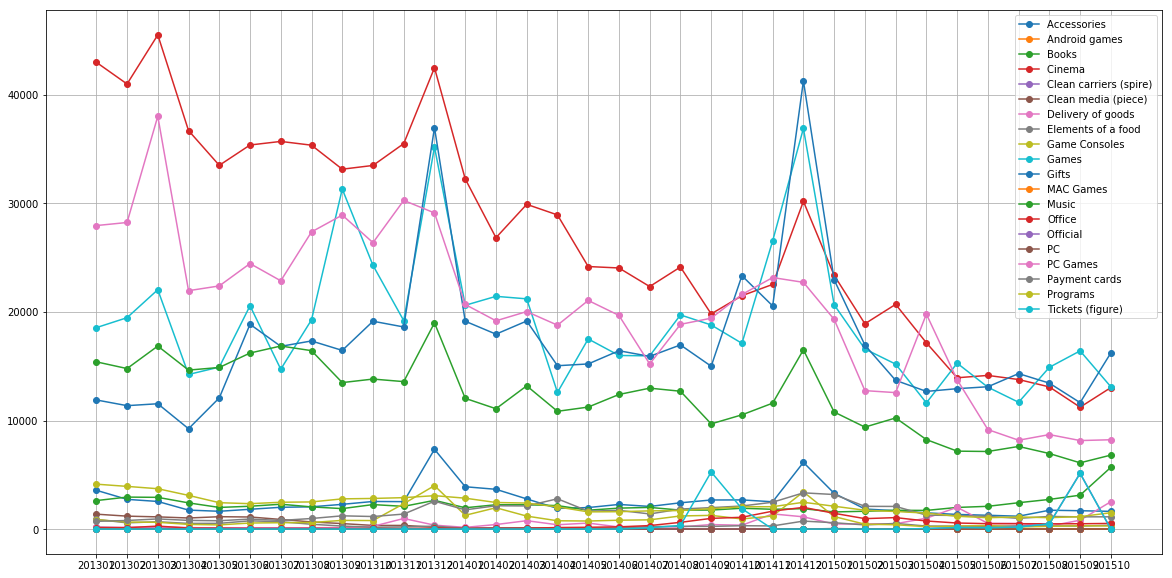

In [324]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))

for category in namelist:
    monthlist = []
    listbycate = []
    for index, data in enumerate(json[category]):
        monthlist.append(yearmonth[index])
        listbycate.append(json[category][data])
    plt.plot(monthlist, listbycate, marker="o")
plt.legend(namelist, loc='best') 
plt.grid(True)
plt.show()

2.큰카테고리 / 작은카테고리  월별로 제일 많이 팔리는 것들?

In [432]:
b = DataFrame(pre_data_with_cate.groupby(["year","month", "en_category"])["item_cnt_day"].sum())
b = b.unstack().fillna(0).reset_index()
b["yearmonth"] = list(map(yearmonth, b["year"], b["month"]))
b =b.T
b

0       1       2   \
             en_category                                                      
year                                                   2013    2013    2013   
month                                                    01      02      03   
item_cnt_day Accessories - PS2                            1       1       0   
             Accessories - PS3                         1390    1190    1025   
             Accessories - PS4                          440     302     293   
             Accessories - PSP                          251     220     226   
             Accessories - PSVita                       623     358     354   
             Accessories - XBOX 360                     870     668     646   
             Accessories - XBOX ONE                       0       0       0   
             Android games - Digit                        0       0       0   
             Books - Artbook, encyclopedia                0       0       0   
             Books - Audiobooks                        1352    1508    1561   
             Books - Audiobooks (Numbers)                 0       0       0   
             Books - Audiobooks 1C                      333     338     323   
             Books - Business Literature                  1       1       0   
             Books - Cognitive Literature                 0       0       0   
             Books - Comics, manga                        0       0       0   
             Books - Computer Literature                  0       3       0   
             Books - Fiction                              0       0       0   
             Books - Guide                                0       0       0   
             Books - Methodical materials 1С            939    1097    1039   
             Books - Number                               0       0       0   
             Books - Postcards                            0       0       0   
             Cinema - Blu-Ray                          6094    6307    6088   
             Cinema - Blu-Ray 3D                       1630    1375    1490   
             Cinema - Blu-Ray 4K                          0       0       0   
             Cinema - Collector's                      1789    1670    1667   
             Cinema - DVD                             33489   31649   36277   
             Clean carriers (spire)                     177     111     106   
             Clean media (piece)                       1374    1192    1125   
             Delivery of goods                          149     159     211   
             Elements of a food                         894     574     675   
             Game Consoles - Other                        0       0       0   
             Game Consoles - PS2                          0       0       0   
             Game Consoles - PS3                        375     236     249   
             Game Consoles - PS4                          0       0       0   
             Game Consoles - PSP                         84      80      76   
             Game Consoles - PSVita                     143     107     102   
             Game Consoles - XBOX 360                   268     222     198   
             Game Consoles - XBOX ONE                     0       0       0   
             Games - Accessories for games              641     475     554   
             Games - PS2                                  3       1       2   
             Games - PS3                               8983   10095   12327   
             Games - PS4                                  0       0       0   
             Games - PSP                               3492    2838    2820   
             Games - PSVita                            1286     788     762   
             Games - XBOX 360                          4150    5275    5584   
             Games - XBOX ONE                             0       0       0   
             Gifts - Attributes                         108     144     111   
             Gifts - Bags, A

In [446]:
b_small = b.loc["item_cnt_day"]
b_small.head()

b_json = b_small.to_dict(orient='index')
b_namelist = b_small.index.tolist()
yearmonth

<function __main__.<lambda>>

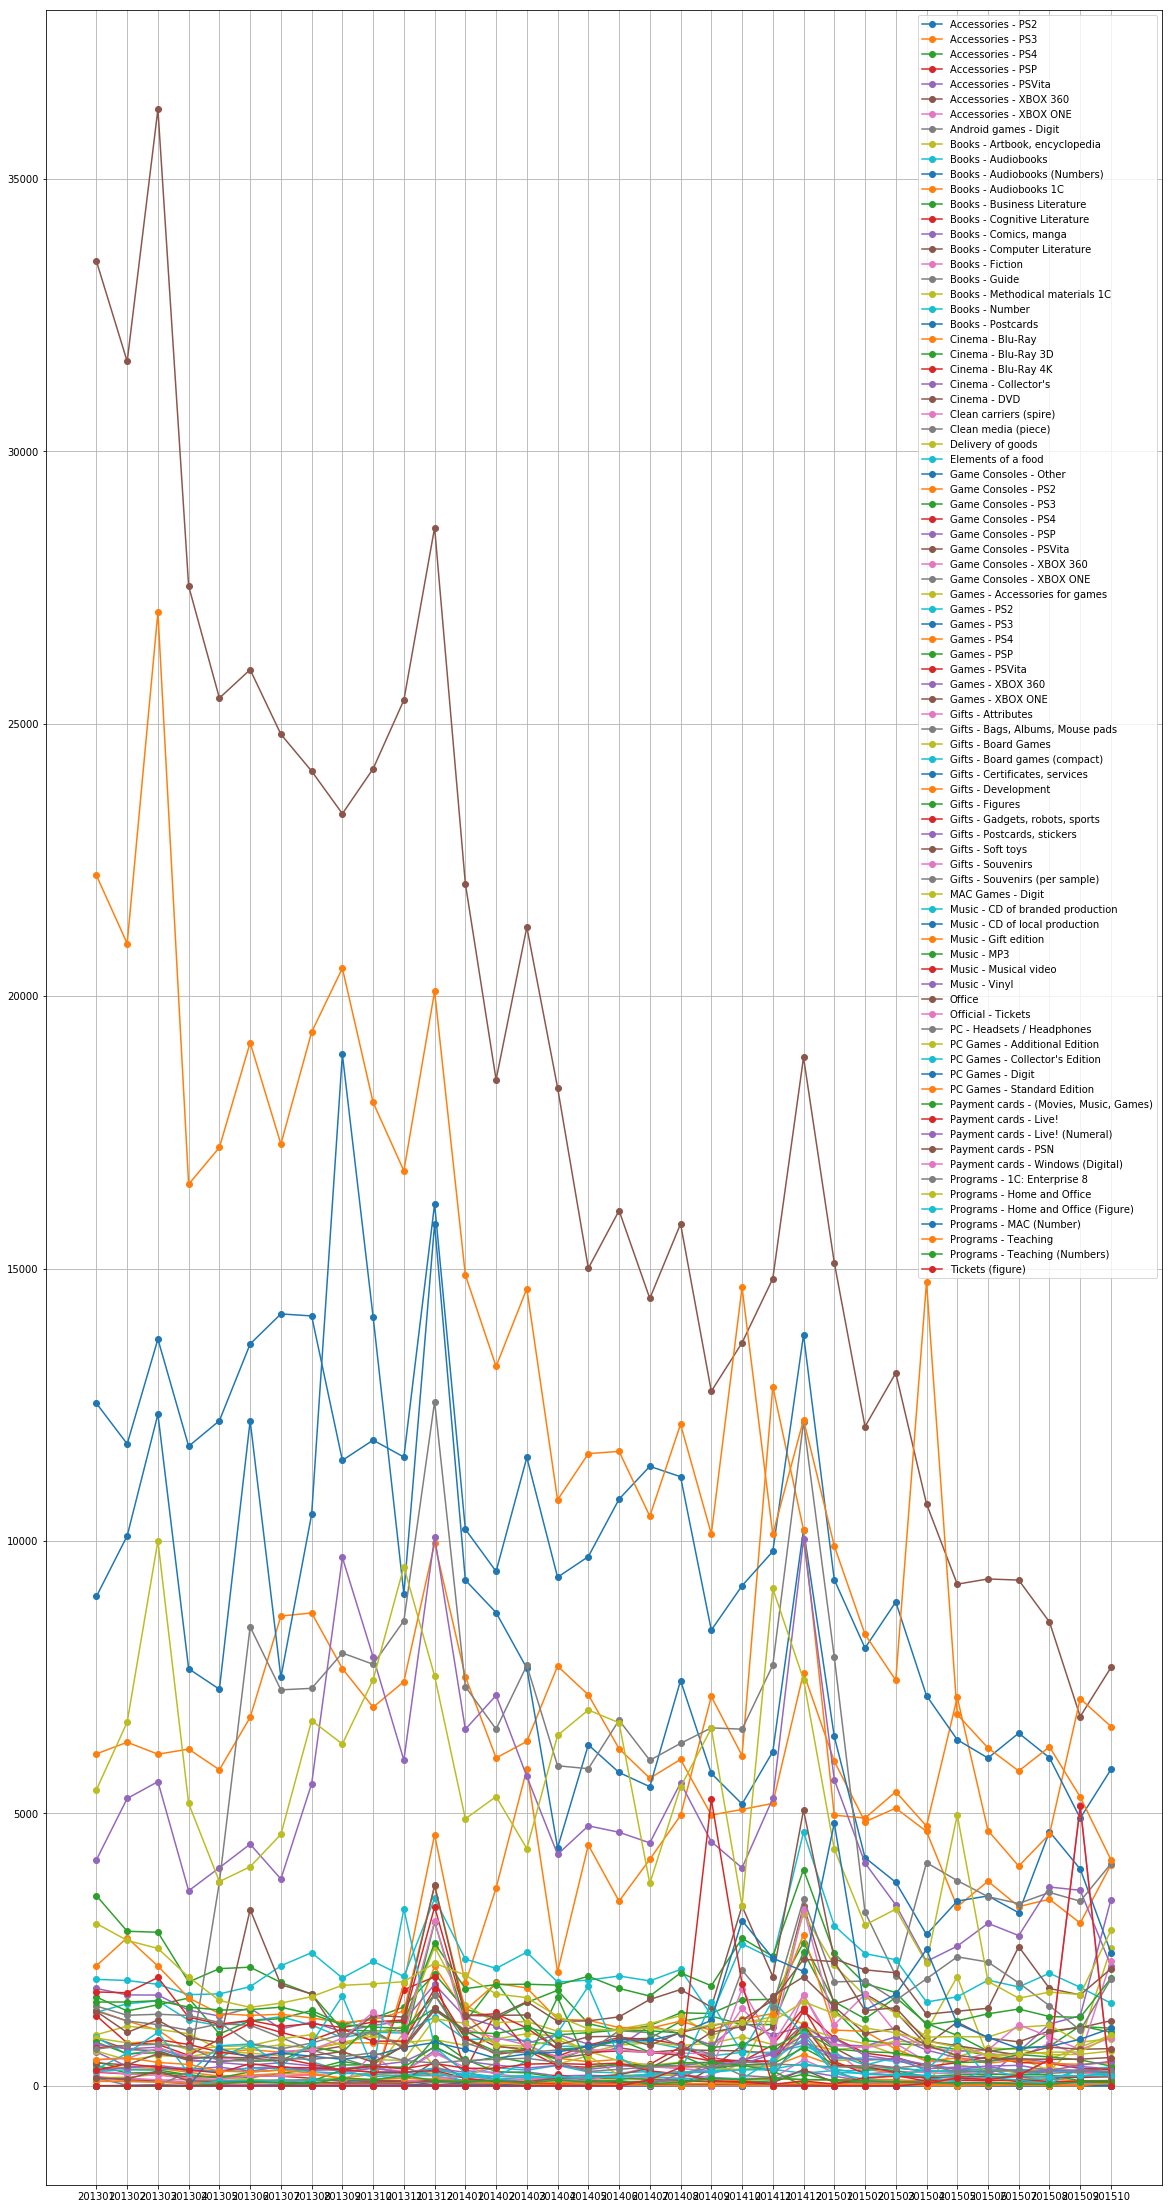

In [452]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,40))

for category in b_namelist:
    monthlist = []
    listbycate = []
    for index, data in enumerate(b_json[category]):
        monthlist.append(yearmonthlist[index])
        listbycate.append(b_json[category][data])
    plt.plot(monthlist, listbycate, marker="o")
plt.legend(b_namelist, loc='best') 
plt.grid(True)
plt.show()

몇가지 생각할것:
11월과 12월에서 두드러지게 상승하는 카테고리들이 있다.
다만, 그럼에도 불구하고 지속적으로 판매가 되고 있지 않은 카테고리들이 있다.  그 카테고리들은 어차피 리그레션에 넣으면 0가 되려나...? 

지금까지는 전체 상점별에서 아이템이 어떻게 팔릴지 봤는데
그럼 이런것도 생각할 수 있지않을까?

2-1: 전체 큰 카테고리중 각 카테고리가 얼마나 차지했는지, 그 비율을 볼수 있지않을까? 그리고 그것을 전체카테고리의 에측량으로 예측을 헀을때, 그 안에서 각 월별 distribution은 일정한 비율을 차지하지 않을까?

In [501]:
pre_data_with_cate.head()
yearmonth = lambda x,y : str(x)+str(y)    
pre_data_with_cate["yearmonth"]=  list(map(yearmonth, pre_data_with_cate["year"], pre_data_with_cate["month"]))
pre_data_with_cate.head()
                                                                                                     

,shop_id,item_id,item_price,item_cnt_day,en_shop,Region,day,month,year,item_category_id,big_cate,en_category,yearmonth
0,59,22154,999.0,1.0,"Yaroslavl Shopping center ""Altair""",Yaroslavl,02,01,2013,37,Cinema,Cinema - Blu-Ray,201301
1,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,02,01,2013,37,Cinema,Cinema - Blu-Ray,201301
2,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,03,01,2013,37,Cinema,Cinema - Blu-Ray,201301
3,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,20,01,2013,37,Cinema,Cinema - Blu-Ray,201301
4,25,22154,999.0,1.0,"Moscow TRK ""Atrium""",Moscow,23,01,2013,37,Cinema,Cinema - Blu-Ray,201301


In [505]:
ak2 = DataFrame(pre_data_with_cate.groupby(["yearmonth", "big_cate", "en_category"])["item_cnt_day"].sum())
ak2.unstack().fillna(0)

item_cnt_day                    \
en_category                      Accessories - PS2 Accessories - PS3   
yearmonth big_cate                                                     
201301    Accessories                          1.0            1390.0   
          Books                                0.0               0.0   
          Cinema                               0.0               0.0   
          Clean carriers (spire)               0.0               0.0   
          Clean media (piece)                  0.0               0.0   
          Delivery of goods                    0.0               0.0   
          Elements of a food                   0.0               0.0   
          Game Consoles                        0.0               0.0   
          Games                                0.0               0.0   
          Gifts                                0.0               0.0   
          Music                                0.0               0.0   
          Office                               0.0               0.0   
          PC                                   0.0               0.0   
          PC Games                             0.0               0.0   
          Payment cards                        0.0               0.0   
          Programs                             0.0               0.0   
201302    Accessories                          1.0            1190.0   
          Books                                0.0               0.0   
          Cinema                               0.0               0.0   
          Clean carriers (spire)               0.0               0.0   
          Clean media (piece)                  0.0               0.0   
          Delivery of goods                    0.0               0.0   
          Elements of a food                   0.0               0.0   
          Game Consoles                        0.0               0.0   
          Games                                0.0               0.0   
          Gifts                                0.0               0.0   
          Music                                0.0               0.0   
          Office                               0.0               0.0   
          PC                                   0.0               0.0   
          PC Games                             0.0               0.0   
          Payment cards                        0.0               0.0   
          Programs                             0.0               0.0   
201303    Accessories                          0.0            1025.0   
          Books                                0.0               0.0   
          Cinema                               0.0               0.0   
          Clean carriers (spire)               0.0               0.0   
          Clean media (piece)                  0.0               0.0   
          Delivery of goods                    0.0               0.0   
          Elements of a food                   0.0               0.0   
          Game Consoles                        0.0               0.0   
          Games                                0.0               0.0   
          Gifts                                0.0               0.0   
          Music                                0.0               0.0   
          Office                               0.0               0.0   
          PC Games                             0.0               0.0   
          Payment cards                        0.0               0.0   
          Programs                             0.0               0.0   
201304    Accessories                          0.0             646.0   
          Books                                0.0               0.0   
          Cinema                               0.0               0.0   
          Clean carriers (spire)               0.0               0.0   
          Clean media (piece)                  0.0               0.0   
          Delivery of goods                    0.0               0.0   
      

In [539]:
ak2.reset_index()
sumtable = DataFrame(ak2.groupby(["yearmonth", "big_cate"])["item_cnt_day"].sum())
temp = sumtable.unstack().reset_index()
temp.head()
drop l temp.columns.get_level_values(0)

SyntaxError: can't delete function call (<ipython-input-539-e6a4fdb977eb>, line 5)

In [513]:
temp(index = temp["yearmonth"])

TypeError: 'DataFrame' object is not callable

3.Region 별로 큰카테고리가 차이가 있는지? 

4.폐업하고 난 다음에 Region의 판매 총량이 많이 변했는지? 변헀다면 Online으로의 파급효과는 어떘는지?

4.프로모션 분석?